# Bench Marks and Tests for Code

In [1]:
import numpy as np
import time as t

In [2]:
def find_index_forloop(_values, _unsorted):
    N = len(_values)
    _idx = np.zeros(N, dtype=np.int32)
    for j in range(N):
        _idx[j] = np.argmax(_values[j] == _unsorted)
    return _idx

def find_index_1D_dict(_values, _dict):
    ''' Use a for loop and a dictionary. _values are the IDs to search for. _dict must be in format 
    (cell IDs: index) '''
    _idx_vec = np.zeros(len(_values), dtype=np.int32)
    for i in range(len(_values)):
        _idx_vec[i] = _dict[_values[i]]
    return _idx_vec

def find_index_1D_tile(_values, _unsorted):
    ''' tile and reshape the array '''
    # convert this to rows 
    _values_2d_T = np.atleast_2d(_values).transpose()
    _unsorted_2d = np.tile(_unsorted, (len(_values),1))
    _idx_vec = np.argmax(_values_2d_T == _unsorted_2d, axis=1)
    return _idx_vec

def find_index_1D_repeat(_values, _unsorted):
    ''' use repeat instead of tile '''
    # convert this to rows
    _values_2d_T = np.atleast_2d(_values).transpose()
    _unsorted_2d = np.repeat(np.atleast_2d(_unsorted), repeats=len(_values), axis=0)
    _idx_vec = np.argmax(_values_2d_T == _unsorted_2d, axis=1)
    return _idx_vec

In [3]:
a = np.arange(10)
np.random.shuffle(a)
vals = np.array([2,3])
print('Searching for: '+str(vals))
print('In: '+str(a))

Searching for: [2 3]
In: [7 6 9 8 2 5 4 3 1 0]


In [4]:
indices = find_index_1D_tile(vals, a)
print(indices)
indices = find_index_1D_repeat(vals, a)
print(indices)
indices = find_index_forloop(vals, a)
print(indices)

idx_dict = dict(zip(a, np.arange(10)))
indices = find_index_1D_dict(vals, idx_dict)
print(indices)

[4 7]
[4 7]
[4 7]
[4 7]


#### Big Loop for benchmarking

In [5]:
loop_num = 100
list_size = 250
tag_size = 25
time_list = []
label_list = ['tile', 'repeat', 'dict', 'for loop']

unsorted_nums = np.arange(list_size)
np.random.shuffle(unsorted_nums)
idx_dict = dict(zip(unsorted_nums, np.arange(list_size)))
tags = np.arange(tag_size)

## TILE ##
t0 = t.time()
for j in range(loop_num):
    indices = find_index_1D_tile(tags, unsorted_nums)
t1 = t.time()
time_list.append(t1 - t0)

## REPEAT ##
t0 = t.time()
for j in range(loop_num):
    indices = find_index_1D_repeat(tags, unsorted_nums)
t1 = t.time()
time_list.append(t1 - t0)

## DICT ##
t0 = t.time()
for j in range(loop_num):
    indices = find_index_1D_dict(tags, idx_dict)
t1 = t.time()
time_list.append(t1 - t0)

## forloop ##
t0 = t.time()
for j in range(loop_num):
    indices = find_index_forloop(tags, unsorted_nums)
t1 = t.time()
time_list.append(t1 - t0)

In [6]:
for m in range(len(time_list)):
    print(label_list[m]+':  '+str(np.round(time_list[m], 2)))

tile:  0.01
repeat:  0.0
dict:  0.0
for loop:  0.01


In [7]:
import numpy as np
my_array = None
if my_array is not None:
    print('yay')
my_array = np.array([1,2,3])
if my_array is not None:
    print('found it')

found it


In [8]:
A = np.arange(12).reshape((2,6))
print(A)
A[:,1:6] = 0
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[0 0 0 0 0 0]
 [6 0 0 0 0 0]]


In [9]:
track_sample_layer = np.array([1,2,3,12,13,14])

track_arr = np.zeros((6,6))
track_arr[:,5] = track_sample_layer
# track flag
track_arr[:,4] = np.ones((6,))
track_arr[:,3] = 5

# Fill in eta and phi values
# this is complicated - simplify?
p, q = 0, 1
for j in range(12):
    # This gives the key for the track dict
    track_arr[p,q] = 7
    if j%2 != 0:
        p += 1
        q = 1
    else:
        q = 2
print(track_arr)

[[ 0.  7.  7.  5.  1.  1.]
 [ 0.  7.  7.  5.  1.  2.]
 [ 0.  7.  7.  5.  1.  3.]
 [ 0.  7.  7.  5.  1. 12.]
 [ 0.  7.  7.  5.  1. 13.]
 [ 0.  7.  7.  5.  1. 14.]]


In [10]:
print((1008217/46) * 8)

175342.08695652173


In [11]:
C = track_arr[:,:6]
print(C)

[[ 0.  7.  7.  5.  1.  1.]
 [ 0.  7.  7.  5.  1.  2.]
 [ 0.  7.  7.  5.  1.  3.]
 [ 0.  7.  7.  5.  1. 12.]
 [ 0.  7.  7.  5.  1. 13.]
 [ 0.  7.  7.  5.  1. 14.]]


In [12]:
import time
import sys

toolbar_width = 40

# setup toolbar
sys.stdout.write("["+" "*toolbar_width+"]")
sys.stdout.flush()
time.sleep(1)
for j in range(toolbar_width):
    sys.stdout.write("\b")
sys.stdout.flush()

for i in range(toolbar_width):
    time.sleep(.1) # do real work here
    # update the bar
    sys.stdout.write("#")
    sys.stdout.flush()

sys.stdout.write("]\n") # this ends the progress bar

[                                       ########################################]


2

In [13]:
events = [i for i in range(10)]
print(events)
print(events[:1])
print(events[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0]
0


In [14]:
A = np.arange(6).reshape((2,3))
print(A)
B = np.array([0,1,0])
print(B)
print(A.shape)
print(B.shape)
print(np.dot(A,B))


[[0 1 2]
 [3 4 5]]
[0 1 0]
(2, 3)
(3,)
[1 4]


In [15]:
class callable_class:
    
    def __init__(self):
        self.a = 5
        self.b = 7
    
    def __call__(self, a, b):
        self.a = a
        self.b = b
        
class non_callable_class:
    
    def __init__(self):
        self.a = 5
        self.b = 7

In [16]:
call_obj = callable_class()
print(call_obj.a, call_obj.b)

call_obj(8,9)
print(call_obj.a, call_obj.b)

5 7
8 9


In [17]:
class non_callable_class:
    
    def __init__(self):
        self.a = 5
        self.b = 7

class return_class:
    
    def __init__(self):
        self.new_object = None
        self.build()
        
    def build(self):
        self.new_object = non_callable_class()
        return self.new_object

In [18]:
obj = return_class()
print(obj.new_object.a)

5


# Benchmarking uproot Processes

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput
print(ak.__version__)
print(np.__version__)
print(ur.__version__)

import sys
sys.path.append('/home/russbate/MLPionCollaboration/LCStudies/util/')
import deep_set_util as dsu

1.5.0
1.21.2
4.1.4


In [28]:
print(dsu.track_branches);print()
print(dsu.event_branches);print()
print(dsu.ak_event_branches);print()
print(dsu.np_event_branches);print()

['trackEta_EMB1', 'trackPhi_EMB1', 'trackEta_EMB2', 'trackPhi_EMB2', 'trackEta_EMB3', 'trackPhi_EMB3', 'trackEta_TileBar0', 'trackPhi_TileBar0', 'trackEta_TileBar1', 'trackPhi_TileBar1', 'trackEta_TileBar2', 'trackPhi_TileBar2']

['cluster_nCells', 'cluster_cell_ID', 'cluster_cell_E', 'cluster_nCells', 'nCluster', 'eventNumber', 'nTrack', 'nTruthPart', 'truthPartPdgId', 'cluster_Eta', 'cluster_Phi', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'truthPartE', 'cluster_ENG_CALIB_TOT', 'cluster_E', 'truthPartPt']

['cluster_nCells', 'cluster_cell_ID', 'cluster_cell_E', 'cluster_nCells', 'nTruthPart', 'truthPartPdgId', 'cluster_Eta', 'cluster_Phi', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'truthPartE', 'cluster_ENG_CALIB_TOT', 'cluster_E', 'truthPartPt', 'cluster_cell_hitsE_EM', 'cluster_cell_hitsE_nonEM']

['nCluster', 'eventNumber', 'nTrack', 'nTruthPart']



In [30]:
filename10 = '/data/atlas/akong/singlerho-percell/'\
           +'user.akong.26471083.OutputStream._000010.root'

filename11 = '/data/atlas/akong/singlerho-percell/'\
           +'user.akong.26471083.OutputStream._000011.root'

t0 = cput()
with ur.open(filename10) as file10:
    event_tree10 = file10['EventTree']
t1 = cput()
LT_10 = t1 - t0

t0 = cput()
with ur.open(filename11) as file11:
    event_tree11 = file11['EventTree']
t1 = cput()
LT_11 = t1 - t0

t0 = cput()
with ur.open(filename10) as file10:
    event_tree10 = file10['EventTree']
    event_dict = dsu.dict_from_tree(tree=event_tree10, branches=dsu.ak_event_branches,
                                    np_branches=dsu.np_event_branches)
t1 = cput()
LT_10_ = t1 - t0

print('Time to load file 10: '+repr(LT_10))
print('Time to load file 11: '+repr(LT_11))
print('Time to load file 10 with : '+repr(LT_10_))

Time to load file 10: 0.11131463572382927
Time to load file 11: 0.246827800758183
Time to load file 10 with : 18.39915110450238


In [51]:
def dict_from_tree2(tree, branches=None, np_branches=None):
    ''' Loads branches as default awkward arrays and np_branches as numpy arrays.
    Note need to modify this to pass either branches or np branches and still work '''
    reg_dict = dict()
    if branches is not None:
        dictionary = tree.arrays(filter_name=branches)[branches]
    
    np_dict = dict()
    if np_branches is not None:
        np_arrays = tree.arrays(filter_name=np_branches)
        for np_key in np_branches:
            np_dict[np_key] = ak.to_numpy( np_arrays[np_key] )
    
    if branches is not None and np_branches is not None:
        dictionary = {**np_dict, **reg_dict}
        
    if branches is None and np_branches is None:
        raise ValueError("No branches passed to function.")
        
    return dictionary

In [53]:
filename10 = '/data/atlas/akong/singlerho-percell/'\
           +'user.akong.26471083.OutputStream._000010.root'

filename11 = '/data/atlas/akong/singlerho-percell/'\
           +'user.akong.26471083.OutputStream._000011.root'

# try loading small file
t0 = cput()
with ur.open(filename10) as file10:
    event_tree10 = file10['EventTree']
t1 = cput()
LT_10 = t1 - t0

# try simply loading bigger file
t0 = cput()
with ur.open(filename11) as file11:
    event_tree11 = file11['EventTree']
t1 = cput()
LT_11 = t1 - t0

# try with old function, small file, all branches
t0 = cput()
with ur.open(filename10) as file10:
    event_tree10 = file10['EventTree']
    event_dict = dsu.dict_from_tree(tree=event_tree10, branches=dsu.ak_event_branches,
                                    np_branches=dsu.np_event_branches)
t1 = cput()
LT_10_old = t1 - t0

# try with new function, small file, all branches
t0 = cput()
with ur.open(filename10) as file10:
    event_tree10 = file10['EventTree']
    event_dict = dict_from_tree2(tree=event_tree10, branches=dsu.ak_event_branches,
                                    np_branches=dsu.np_event_branches)
t1 = cput()
LT_10_new = t1 - t0

# try with new function, bigger file, all branches
t0 = cput()
with ur.open(filename11) as file11:
    event_tree11 = file11['EventTree']
    event_dict = dict_from_tree2(tree=event_tree11, branches=dsu.ak_event_branches,
                                    np_branches=dsu.np_event_branches)
t1 = cput()
LT_11_newBig = t1 - t0

# try with new function, bigger file, REDUCED branches
b1 = ["cluster_cell_ID", "cluster_cell_E", "cluster_Eta", "cluster_Phi",
    "cluster_cell_hitsE_EM", "cluster_cell_hitsE_nonEM", 'truthPartE',
    'cluster_ENG_CALIB_TOT']
b2 = ["nCluster", "eventNumber"]

t0 = cput()
with ur.open(filename11) as file11:
    event_tree11 = file11['EventTree']
    event_dict = dict_from_tree2(tree=event_tree11, branches=b1,
                                    np_branches=b2)
t1 = cput()
LT_11_newBigSmall = t1 - t0


print('Time to load file 10: '+repr(LT_10))
print('Time to load file 11: '+repr(LT_11))
print('Time to load file 10 with old function: '+repr(LT_10_old))
print('Time to load file 10 with new function: '+repr(LT_10_new))
print('Time to load file 11 with new function: '+repr(LT_11_newBig))
print('Time to load file 11 with new function and clipped branches: '+repr(LT_11_newBigSmall))

Time to load file 10: 0.26065381430089474
Time to load file 11: 0.14891027193516493
Time to load file 10 with old function: 22.98386911675334
Time to load file 10 with new function: 7.937120943330228
Time to load file 11 with new function: 1364.5884834174067
Time to load file 11 with new function and clipped branches: 1338.5896171117201


In [42]:
from platform import python_version
python_version()

'3.8.10'

# Compute Averages from CLO Output Files

In [1]:
cellE_mean = (-2.234687302600965 + -2.1826265122783526)/2
cellE_std = (1.9115307566123543 + 1.932786980244513)/2

Eta_std = (0.05483370415405759 + 0.09803379949581109)/2

Phi_std = (0.6571351152071913 + 0.588562927404193)/2

target_mean = (2.9916113226481054 + 2.046657588606947)/2

print('Average cellE_mean: {}'.format(cellE_mean))
print('Average cellE_std: {}'.format(cellE_std))
print('Average Eta_std: {}'.format(Eta_std))
print('Average Phi_std: {}'.format(Phi_std))
print('Average target_mean: {}'.format(target_mean))

Average cellE_mean: -2.208656907439659
Average cellE_std: 1.9221588684284336
Average Eta_std: 0.07643375182493434
Average Phi_std: 0.6228490213056921
Average target_mean: 2.519134455627526


In [ ]:
file_loc_1 = '/fast_scratch_2/atlas/staged/X_CLO_PIPM_400_train.npy'
file_loc_2 = '/fast_scratch_2/atlas/staged/X_CLO_PIPM_400_train.npy'
print( == )

nEvent = 11375
multiplier = np.floor(nEvent/10).astype(int)
print(multiplier);print()

for i in range(10):
    low_idx = i*multiplier
    high_idx = (i+1)*multiplier
    if i == 9:
        high_idx = nEvent
    print('[{} : {}]'.format(low_idx, high_idx))

In [3]:
alist = []
for i in range(3):
    alist.append('a')
    
for i, char in enumerate(alist):
    print(i, char)

0 a
1 a
2 a


In [4]:
(10./9.)*75

83.33333333333334

python3 train_pflow.py --batch_size=2000 --learning_rate=.001 --epochs=20 --full_data --verbose=2 --data=STMC --GPU=4 --model=PFN_base --save_model --train_val 90 10 2>&1 | tee training_output/train_PFN_base_full_STMC_2022-06-22.txt

python3 train_pflow.py --batch_size=1600 --learning_rate=.005 --epochs=100 --events=500000 --verbose=2 --data=STMC --GPU=3 --model=PFN_base --save_hist 2>&1 | tee training_output/LR_scan_PFN_base_STMC_500000ev_LR5e-3_2022-07-14.txt


# Find Shapes of Training Arrays

In [1]:
import numpy as np

In [3]:
X_tr = np.load('/fast_scratch_1/atlas/normalized/X_STMC_v2_400_train_norm.npy', mmap_mode='r')
X_ev = np.load('/fast_scratch_1/atlas/normalized/X_STMC_v2_100_test_norm.npy', mmap_mode='r')
print('STMC Training Array')
print(X_tr.shape)
print('STMC Evaluation Array')
print(X_ev.shape)

STMC Training Array
(4106533, 1600, 5)
STMC Evaluation Array
(1025396, 1600, 5)


In [5]:
X_tr = np.load('/fast_scratch_1/atlas/normalized/X_CLO_PI0_400_train_norm.npy', mmap_mode='r')
X_ev = np.load('/fast_scratch_1/atlas/normalized/X_CLO_PI0_100_test_norm.npy', mmap_mode='r')
print('CLO PI0 Training Array')
print(X_tr.shape)
print('CLO PI0 Evaluation Array')
print(X_ev.shape)

CLO PI0 Training Array
(7882736, 1300, 4)
CLO PI0 Evaluation Array
(1971275, 1300, 4)


In [7]:
X_tr = np.load('/fast_scratch_2/atlas/normalized/X_CLO_PIPM_400_train_norm.npy', mmap_mode='r')
X_ev = np.load('/fast_scratch_2/atlas/normalized/X_CLO_PIPM_100_test_norm.npy', mmap_mode='r')
print('CLO PIPM Training Array')
print(X_tr.shape)
print('CLO PIPM Evaluation Array')
print(X_ev.shape)

CLO PIPM Training Array
(14409893, 1300, 4)
CLO PIPM Evaluation Array
(3597810, 1300, 4)


In [5]:
if True:
    print('A')
    pass
    print('B')

A
B


## Double Check psuedorapidity

In [ ]:
eta = np.linspace()

# Making Scheduled Learning Rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def linearLR(epoch, lr, min_lr=1e-6, max_lr=.05, epochs=100):
    delta = (max_lr - min_lr)/(epochs - 1)
    return lr - delta

def cyclicLR(epoch, lr, cycles, epochs):
    remdr = epoch % cycles
    steps_per_cycle = epochs - remdr
    return None

def TrWave(x, slope=1., scale=1.):
    return scale - np.abs(((slope*x) % (2*scale)) - scale)

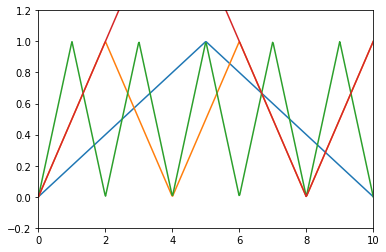

In [84]:
x = np.linspace(0,10,500,endpoint=True)
y1 = TrWave(x, slope=.2)
y2 = TrWave(x, slope=.5)
y3 = TrWave(x, slope=1)
y4 = TrWave(x, slope=.5, scale=2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.ylim(-.2,1.2)
plt.xlim(0,10)
# plt.legend()
plt.show()

## Define Properly cyclic learning rate

In [ ]:
def cyclicLearningRateList(epoch, lr, epochs, cycles, minLR, maxLR):\
    
    nPerCycle = np.floor(epochs/cycles).astype(int)
    
    for i in range(epochs):
        cycle = np.floor(i/nPerCycle).astype(int)
        
    return None